In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Classes and Functions

At this point you know how to use functions to organize code and how to use built-in types to organize data.
The next step is **object-oriented programming**, which uses programmer-defined types to organize both code and data.

Object-oriented programming is a big topic, so we will proceed gradually.
In this chapter, we'll start with code that is not idiomatic -- that is, it is not the kind of code experienced programmers write -- but it is a good place to start.
In the next two chapters, we will use additional features to write more idiomatic code.

## Programmer-defined types

We have used many of Python's built-in types -- now we will define a new type.
As a first example, we'll create a type called `Time` that represents a time of day.
A programmer-defined type is also called a **class**.
A class definition looks like this:

In [2]:
class Time:
    """Represents a time of day."""

The header indicates that the new class is called `Time`.
The body is a docstring that explains what the class is for.
Defining a class creates a **class object**.

The class object is like a factory for creating objects.
To create a `Time` object, you call `Time` as if it were a function.

In [3]:
lunch = Time()

The result is a new object whose type is `__main__.Time`, where `__main__` is the name of the  module where `Time` is defined.

In [4]:
type(lunch)

__main__.Time

When you print an object, Python tells you what type it is and where it is stored in memory (the prefix `0x` means that the following number is in hexadecimal).

In [5]:
print(lunch)

Creating a new object is called **instantiation**, and the object is an **instance** of the class.

## Attributes

An object can contain variables, which are called **attributes** and pronounced with the emphasis on the first syllable, like "AT-trib-ute", rather than the second syllable, like "a-TRIB-ute".
We can create attributes using dot notation.

In [6]:
lunch.hour = 11
lunch.minute = 59
lunch.second = 1

This example creates attributes called `hour`, `minute`, and `second`, which contain the hours, minutes, and seconds of the time `11:59:01`, which is lunch time as far as I am concerned.

The following diagram shows the state of `lunch` and its attributes after these assignments. 

In [7]:
from diagram import make_frame, make_binding

d1 = dict(hour=11, minute=59, second=1)
frame = make_frame(d1, name='Time', dy=-0.3, offsetx=0.48)
binding = make_binding('lunch', frame)

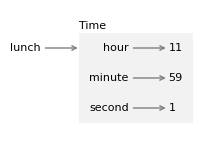

In [8]:
from diagram import diagram, adjust

width, height, x, y = [1.77, 1.24, 0.25, 0.86]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

The variable `lunch` refers to a `Time` object, which contains three attributes. 
Each attribute refers to an integer.
A state diagram like this -- which shows an object and its attributes -- is called an **object diagram**.

You can read the value of an attribute using the dot operator.

In [9]:
lunch.hour

11

You can use an attribute as part of any expression.

In [10]:
total_minutes = lunch.hour * 60 + lunch.minute
total_minutes

719

And you can use the dot operator in an expression in an f-string.

In [11]:
f'{lunch.hour}:{lunch.minute}:{lunch.second}'

'11:59:1'

But notice that the previous example is not in the standard format.
To fix it, we have to print the `minute` and `second` attributes with a leading zero.
We can do that by extending the expressions in curly braces with a **format specifier**.
In the following example, the format specifiers indicate that `minute` and `second` should be displayed with at least two digits and a leading zero if needed.

In [12]:
f'{lunch.hour}:{lunch.minute:02d}:{lunch.second:02d}'

'11:59:01'

We'll use this f-string to write a function that displays the value of time objects.
You can pass an object as an argument in the usual way.
For example, the following function takes a `Time` object as an argument. 

In [13]:
def print_time(time):
    s = f'{time.hour:02d}:{time.minute:02d}:{time.second:02d}'
    print(s)

When we call it, we can pass `lunch` as an argument.

In [14]:
print_time(lunch)

11:59:01


## Objects as return values

Functions can return objects. For example, `make_time` takes parameters called `hour`, `minute`, and `second`, stores them as attributes in a `Time` object, and returns the new object.

In [15]:
def make_time(hour, minute, second):
    time = Time()
    time.hour = hour
    time.minute = minute
    time.second = second
    return time

It might be surprising that the parameters have the same names as the attributes, but that's a common way to write a function like this.
Here's how we use `make_time` to create a `Time` object.`

In [16]:
time = make_time(11, 59, 1)
print_time(time)

11:59:01


## Objects are mutable

Suppose you are going to a screening of a movie, like *Monty Python and the Holy Grail*, which starts at `9:20 PM` and runs for `92` minutes, which is one hour `32` minutes.
What time will the movie end?

First, we'll create a `Time` object that represents the start time.

In [17]:
start = make_time(9, 20, 0)
print_time(start)

09:20:00


To find the end time, we can modify the attributes of the `Time` object, adding the duration of the movie.

In [18]:
start.hour += 1
start.minute += 32
print_time(start)

10:52:00


The movie will be over at 10:52 PM.

Let's encapsulate this computation in a function and generalize it to take the duration of the movie in three parameters: `hours`, `minutes`, and `seconds`.

In [19]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

Here is an example that demonstrates the effect.

In [20]:
start = make_time(9, 20, 0)
increment_time(start, 1, 32, 0)
print_time(start)

10:52:00


The following stack diagram shows the state of the program just before `increment_time` modifies the object.

In [21]:
from diagram import Frame, Binding, Value, Stack

d1 = dict(hour=9, minute=20, second=0)
obj1 = make_frame(d1, name='Time', dy=-0.25, offsetx=0.78)

binding1 = make_binding('start', frame, draw_value=False, dx=0.7)
frame1 = Frame([binding1], name='__main__', loc='left', offsetx=-0.2)

binding2 = Binding(Value('time'), draw_value=False, dx=0.7, dy=0.35)
binding3 = make_binding('hours', 1)
binding4 = make_binding('minutes',32)
binding5 = make_binding('seconds', 0)
frame2 = Frame([binding2, binding3, binding4, binding5], name='increment_time', 
               loc='left', dy=-0.25, offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

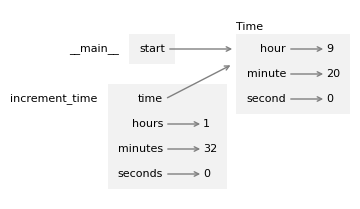

In [22]:
from diagram import Bbox

width, height, x, y = [3.4, 1.89, 1.75, 1.5]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = obj1.draw(ax, x+0.23, y)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

Inside the function, `time` is an alias for `start`, so when `time` is modified, `start` changes.

This function works, but after it runs, we're left with a variable named `start` that refers to an object that represents the *end* time, and we no longer have an object that represents the start time.
It would be better to leave `start` unchanged and make a new object to represent the end time.
We can do that by copying `start` and modifying the copy.

## Copying

The `copy` module provides a function called `copy` that can duplicate any object.
We can import it like this.

In [23]:
from copy import copy

To see how it works, let's start with a new `Time` object that represents the start time of the movie.

In [24]:
start = make_time(9, 20, 0)

And make a copy.

In [25]:
end = copy(start)

Now `start` and `end` contain the same data.

In [26]:
print_time(start)
print_time(end)

09:20:00
09:20:00


But the `is` operator confirms that they are not the same object.

In [27]:
start is end

False

Let's see what the `==` operator does.

In [28]:
start == end

False

You might expect `==` to yield `True` because the objects contain the same data.
But for programmer-defined classes, the default behavior of the `==` operator is the same as the `is` operator -- it checks identity, not equivalence.

## Pure functions

We can use `copy` to write pure functions that don't modify their parameters.
For example, here's a function that takes a `Time` object and a duration in hours, minutes and seconds.
It makes a copy of the original object, uses `increment_time` to modify the copy, and returns it.

In [29]:
def add_time(time, hours, minutes, seconds):
    total = copy(time)
    increment_time(total, hours, minutes, seconds)
    return total

Here's how we use it.

In [30]:
end = add_time(start, 1, 32, 0)
print_time(end)

10:52:00


The return value is a new object representing the end time of the movie.
And we can confirm that `start` is unchanged.

In [31]:
print_time(start)

09:20:00


`add_time` is a **pure function** because it does not modify any of the objects passed to it as arguments and its only effect is to return a value.

Anything that can be done with modifiers can also be done with pure functions.
In fact, some programming languages only allow pure functions.
Programs that use pure functions might be less error-prone than programs that use modifiers.
But modifiers are sometimes convenient and can be more efficient.

In general, I suggest you write pure functions whenever it is reasonable and resort to modifiers only if there is a compelling advantage.
This approach might be called a **functional programming style**.

## Prototype and patch

In the previous example, `increment_time` and `add_time` seem to work, but if we try another example, we'll see that they are not quite correct.

Suppose you arrive at the theater and discover that the movie starts at `9:40`, not `9:20`.
Here's what happens when we compute the updated end time.

In [32]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

10:72:00


The result is not a valid time.
The problem is that `increment_time` does not deal with cases where the number of seconds or minutes adds up to more than `60`.

Here's an improved version that checks whether `second` exceeds `60` -- if so, it increments `minute` -- then checks whether `minute` exceeds `60` -- if so, it increments `hour`.

In [33]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

    if time.second >= 60:
        time.second -= 60
        time.minute += 1

    if time.minute >= 60:
        time.minute -= 60
        time.hour += 1

Fixing `increment_time` also fixes `add_time`, which uses it.
So now the previous example works correctly.

In [34]:
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


But this function is still not correct, because the arguments might be bigger than `60`.
For example, suppose we are given the run time as `92` minutes, rather than `1` hours and `32` minutes.
We might call `add_time` like this.

In [35]:
end = add_time(start, 0, 92, 0)
print_time(end)

10:72:00


The result is not a valid time.
So let's try a different approach, using the `divmod` function.
We'll make a copy of `start` and modify it by incrementing the `minutes` field.

In [36]:
end = copy(start)
end.minute = start.minute + 92
end.minute

132

Now `minute` is `132`, which is `2` hours and `12` minutes.
We can use `divmod` to divide by `60` and return the number of whole hours and the number of minutes left over.

In [37]:
carry, end.minute = divmod(end.minute, 60)
carry, end.minute

(2, 12)

Now `minute` is correct, and we can add the hours to `hour`.

In [38]:
end.hour += carry
print_time(end)

11:12:00


The result is a valid time.
We can do the same thing with `hour` and `second`, and encapsulate the whole process in a function.

In [39]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds
    
    carry, time.second = divmod(time.second, 60)
    carry, time.minute = divmod(time.minute + carry, 60)
    carry, time.hour = divmod(time.hour + carry, 60)

With this version of `increment_time`, `add_time` works correctly, even if the arguments exceed `60`.

In [40]:
end = add_time(start, 0, 90, 120)
print_time(end)

11:12:00


This section demonstrates a program development plan I call **prototype and patch**.
We started with a simple prototype that worked correctly for the first example.
Then we tested it with more difficult examples -- when we found an error, we modified the program to fix it, like putting a patch on tire with a puncture.

This approach can be effective, especially if you don't yet have a deep understanding of the problem.
But incremental corrections can generate code that is unnecessarily complicated -- since it deals with many special cases -- and unreliable -- since it is hard to know if you have
found all the errors.

## Design-first development

An alternative plan is **design-first development**, which involves more planning before prototyping. In a design-first process, sometimes a high-level insight into the problem makes the programming much easier.

In this case, the insight is that we can think of a `Time` object as a three-digit number in base 60 -- also known as sexagesimal.
The `second` attribute is the "ones column", the `minute` attribute is the "sixties column",
and the `hour` attribute is the "thirty-six hundreds column".
When we wrote `increment_time`, we were effectively doing addition in base 60, which is why we had to carry from one column to the next.

This observation suggests another approach to the whole problem -- we can convert `Time` objects to integers and take advantage of the fact that Python knows how to do integer arithmetic.

Here is a function that converts from a `Time` to an integer.

In [41]:
def time_to_int(time):
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    return seconds

The result is the number of seconds since the beginning of the day.
For example, `01:01:01` is `1` hour, `1` minute and `1` second from the beginning of the day, with is the sum of `3600` seconds, `60` seconds, and `1` second.

In [42]:
time = make_time(1, 1, 1)
print_time(time)
time_to_int(time)

01:01:01


3661

And here's a function that goes in the other direction -- converting an integer to a `Time` object -- using the `divmod` function.

In [43]:
def int_to_time(seconds):
    minute, second = divmod(seconds, 60)
    hour, minute = divmod(minute, 60)
    return make_time(hour, minute, second)

We can test it by converting the previous example back to a `Time`.

In [44]:
time = int_to_time(3661)
print_time(time)

01:01:01


Using these functions, we can write a more concise version of `add_time`.

In [45]:
def add_time(time, hours, minutes, seconds):
    duration = make_time(hours, minutes, seconds)
    seconds = time_to_int(time) + time_to_int(duration)
    return int_to_time(seconds)

The first line converts the arguments to a `Time` object called `duration`.
The second line converts `time` and `duration` to seconds and adds them.
The third line converts the sum to a `Time` object and returns it.

Here's how it works.

In [46]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


In some ways, converting from base 60 to base 10 and back is harder than
just dealing with times. Base conversion is more abstract; our intuition
for dealing with time values is better.

But if we have the insight to treat times as base 60 numbers -- and invest the effort to write the conversion functions `time_to_int` and `int_to_time` -- we get a program that is shorter, easier to read and debug, and more reliable.

It is also easier to add features later. For example, imagine subtracting two `Time` objects to find the duration between them.
The naive approach is to implement subtraction with borrowing.
Using the conversion functions is easier and more likely to be correct.

Ironically, sometimes making a problem harder -- or more general -- makes it easier, because there are fewer special cases and fewer opportunities for error.

(section_debugging_14)=
## Debugging

Python provides several built-in functions that are useful for testing and debugging programs that work with objects.
For example, if you are not sure what type an object is, you can ask.

In [47]:
type(start)

__main__.Time

You can also use `isinstance` to check whether an object is an instance of a particular class.

In [48]:
isinstance(end, Time)

True

If you are not sure whether an object has a particular attribute, you
can use the built-in function `hasattr`.

In [49]:
hasattr(start, 'hour')

True

To get all of the attributes, and their values, in a dictionary, you can use `vars`.

In [50]:
vars(start)

{'hour': 9, 'minute': 40, 'second': 0}

The `structshape` module, which we saw in [Chapter 11](section_debugging_11), also works with programmer-defined types.

In [51]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/structshape.py');

In [52]:
from structshape import structshape

t = start, end
structshape(t)

'tuple of 2 Time'

## Glossary

**object-oriented programming:**
A style of programming that uses objects to organize code and data.

**class:**
 A programmer-defined type. A class definition creates a new class object.

**class object:**
An object that represents a class -- it is the result of a class definition.

**instantiation:**
The process of creating an object that belongs to a class.

**instance:**
 An object that belongs to a class.

**attribute:**
 A variable associated with an object, also called an instance variable.

**object diagram:**
A graphical representation of an object, its attributes, and their values.

**format specifier:**
In an f-string, a format specifier determines how a value is converted to a string.

**pure function:**
A function that does not modify its parameters or have any effect other than returning a value.

**functional programming style:**
A way of programming that uses pure functions whenever possible.

**prototype and patch:**
A way of developing programs by starting with a rough draft and gradually adding features and fixing bugs.

**design-first development:**
A way of developing programs with more careful planning that prototype and patch.

## Exercises

In [53]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

There is a lot of new vocabulary in this chapter.
A conversation with a virtual assistant can help solidify your understanding.
Consider asking:

* "What is the difference between a class and a type?"

* "What is the difference between an object and an instance?"

* "What is the difference between a variable and an attribute?"

* "What are the pros and cons of pure functions compared to modifiers?"

Because we are just getting started with object oriented programming, the code in this chapter is not idiomatic -- it is not the kind of code experienced programmers write.
If you ask a virtual assistant for help with the exercises, you will probably see features we have not covered yet.
In particular, you are likely to see a method called `__init__` used to initialize the attributes of an instance.

If these features make sense to you, go ahead and use them.
But if not, be patient -- we will get there soon.
In the meantime, see if you can solve the following exercises using only the features we have covered so far.

Also, in this chapter we saw one example of a format specifier. For more information, ask "What format specifiers can be used in a Python f-string?"

## Exercises


### Exercise

Write a function called `subtract_time` that takes two `Time` objects and returns the interval between them in seconds -- assuming that they are two times during the same day.

Here's an outline of the function to get you started.

In [54]:
def subtract_time(t1, t2):
    """Compute the difference between two times in seconds.
    
    >>> subtract_time(make_time(1, 1, 1), Time(1, 1, 0))
    1
    """
    return None

In [55]:
# Solution goes here

You can use `doctest` to test your function.

In [56]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(subtract_time)

**********************************************************************
File "__main__", line 4, in subtract_time
Failed example:
    subtract_time(make_time(1, 1, 1), Time(1, 1, 0))
Exception raised:
    Traceback (most recent call last):
      File "/Users/boris/miniconda3/envs/tmp1/lib/python3.9/doctest.py", line 1334, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest subtract_time[0]>", line 1, in <module>
        subtract_time(make_time(1, 1, 1), Time(1, 1, 0))
    TypeError: Time() takes no arguments


### Exercise

Write a function called `is_after` that takes two `Time` objects and returns `True` if the second time is later in the day than the first, and `False` otherwise.

Here's an outline of the function to get you started.

In [57]:
def is_after(t1, t2):
    """Checks whether `t1` is after `t2`.
    
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 0))
    True
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 1))
    True
    >>> is_after(make_time(11, 12, 0), make_time(9, 40, 0))
    False
    """
    return None

In [58]:
# Solution goes here

You can use `doctest` to test your function.

In [59]:
run_doctests(is_after)

**********************************************************************
File "__main__", line 4, in is_after
Failed example:
    is_after(make_time(3, 2, 1), make_time(3, 2, 0))
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in is_after
Failed example:
    is_after(make_time(3, 2, 1), make_time(3, 2, 1))
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 8, in is_after
Failed example:
    is_after(make_time(11, 12, 0), make_time(9, 40, 0))
Expected:
    False
Got nothing


### Exercise

Here's a definition for a `Date` class that represents a date -- that is, a year, month, and day of the month.

In [60]:
class Date:
    """Represents a year, month, and day"""

1. Write a function called `make_date` that takes `year`, `month`, and `day` as parameters, makes a `Date` object, assigns the parameters to attributes, and returns the result the new object. Create an object that represents June 22, 1933.

2. Write a function called `print_date` that takes a `Date` object, uses an f-string to format the attributes, and prints the result. If you test it with the `Date` you created, the result should be `1933-06-22`.

3. Write a function called `is_after` that takes two `Date` objects as parameters and returns `True` if the first comes after the second. Create a second object that represents September 17, 1933, and check whether it comes after the first object.

Hint: You might find it useful to write a function called `date_to_tuple` that takes a `Date` object and returns a tuple that contains its attributes in year, month, day order.

You can use this function outline to get started.

In [61]:
def make_date(year, month, day):
    return None

In [62]:
# Solution goes here

You can use these examples to test `make_date`.

In [63]:
birthday1 = make_date(1933, 6, 22)

In [64]:
birthday2 = make_date(1933, 9, 17)

You can use this function outline to get started.

In [65]:
def print_date(date):
    print('')

In [66]:
# Solution goes here

You can use this example to test `print_date`.

In [67]:
print_date(birthday1)

You can use this function outline to get started.

In [68]:
def is_after(date1, date2):
    return None

In [69]:
# Solution goes here

In [70]:
# Solution goes here

You can use these examples to test `is_after`.

In [71]:
is_after(birthday1, birthday2)  # should be False

In [72]:
is_after(birthday2, birthday1)  # should be True